# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

используем датафрейм
[данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).
за 2019 год

In [2]:
df_2019 = pd.read_csv('https://raw.githubusercontent.com/ABMakushkin/pydp-25/master/visualization/2019.csv')

In [4]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Overall rank - общий рейтинг. Дататафрейм отсортирован в соответсвии с рейтингом. применение любых статистических расчетов к этому столбцу не имеет смысла

Country or region - Страна или регион

Score - Оценка

GDP per capita - ВВП на душу населения

Social support - Социальная поддержка

Healthy life expectancy - Ожидаемая продолжительность здоровой жизни

Freedom to make life choices - Свобода выбора в жизни

Generosity - Щедрость

Perceptions of corruption - Восприятие коррупции

In [5]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


типы данных в порядке

In [6]:
df_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

пропусков в данных нет

In [7]:
df_2019.drop('Overall rank', axis=1).describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


по всем столбцаом кроме общей оценки в min стоят нули. это говорит скорее об отсутсвующих данных, которые заменены на нули.

In [22]:
df[(df['GDP per capita'] == 0) | (df['Social support'] == 0) | (df['Healthy life expectancy'] == 0) | 
   (df['Freedom to make life choices'] == 0)  | (df['Generosity'] == 0) | (df['Perceptions of corruption'] == 0)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
70,71,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.000
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


всего 6 записей (3,85% от общего числа данных) в которых есть нули в каком-либо столбце. эти нули не позволяют оценить реальные минимумы.

Для оценки минимумов исключим данные с нулями (прнимая допущение, что нули это отсутсвующие значения)

In [24]:
df_2019_for_min = df_2019.loc[ (df_2019['GDP per capita'] != 0.) & 
                              (df_2019['Social support']!= 0.) &
                              (df_2019['Healthy life expectancy'] != 0.) &
                              (df_2019['Freedom to make life choices'] != 0.) &
                              (df_2019['Generosity'] != 0.) &
                              (df_2019['Perceptions of corruption'] != 0.)
                             ] 

In [27]:
df_2019_for_min.drop('Overall rank', axis=1).min()

Country or region               Albania
Score                             2.853
GDP per capita                    0.046
Social support                    0.378
Healthy life expectancy           0.168
Freedom to make life choices       0.01
Generosity                        0.025
Perceptions of corruption         0.004
dtype: object

получили корректные минимальные значения

In [15]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [27]:
print('СКО')
df.drop('Overall rank', axis=1).std()

СКО


Score                           1.113120
GDP per capita                  0.398389
Social support                  0.299191
Healthy life expectancy         0.242124
Freedom to make life choices    0.143289
Generosity                      0.095254
Perceptions of corruption       0.094538
dtype: float64

In [28]:
print('Дисперсия')
df.drop('Overall rank', axis=1).var()

Дисперсия


Score                           1.239036
GDP per capita                  0.158714
Social support                  0.089515
Healthy life expectancy         0.058624
Freedom to make life choices    0.020532
Generosity                      0.009073
Perceptions of corruption       0.008937
dtype: float64

Загрузим данные по другим годам

In [96]:
df_2015 = pd.read_csv('https://raw.githubusercontent.com/ABMakushkin/pydp-25/master/visualization/2015.csv')
df_2016 = pd.read_csv('https://raw.githubusercontent.com/ABMakushkin/pydp-25/master/visualization/2016.csv')
df_2017 = pd.read_csv('https://raw.githubusercontent.com/ABMakushkin/pydp-25/master/visualization/2017.csv')
df_2018 = pd.read_csv('https://raw.githubusercontent.com/ABMakushkin/pydp-25/master/visualization/2018.csv')

Пропуски по всем атрибутам

In [98]:
print('2015 - ', df_2015.isna().sum().sum(), 
      '\n2016 - ', df_2016.isna().sum().sum(), 
      '\n2017 - ', df_2017.isna().sum().sum(), 
      '\n2018 - ', df_2018.isna().sum().sum()
     )

2015 -  0 
2016 -  0 
2017 -  0 
2018 -  1


Пропуск только в 2018 году

In [99]:
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [100]:
df_2018[df_2018['Perceptions of corruption'].isna()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


заменяем значение на 0

In [101]:
df_2018['Perceptions of corruption'].fillna(0, inplace=True)

In [102]:
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Пропусков не осталось

Приведем названия столбцов в единый формат

In [104]:
df_2017 = df_2017[['Happiness.Rank', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.']]
df_2016 = df_2016[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
df_2015 = df_2015[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
df_2017.rename(columns={'Happiness.Rank': 'Overall rank', 
                'Country': 'Country or region', 
                'Happiness.Score':'Score', 
                'Economy..GDP.per.Capita.': 'GDP per capita', 
                'Health..Life.Expectancy.': 'Healthy life expectancy', 
                'Freedom': 'Freedom to make life choices', 
                'Trust..Government.Corruption.':  'Perceptions of corruption'}
               , inplace=True )
df_2016.rename(columns={'Happiness Rank': 'Overall rank', 
                'Country': 'Country or region', 
                'Happiness Score':'Score', 
                'Economy (GDP per Capita)': 'GDP per capita', 
                'Health (Life Expectancy)': 'Healthy life expectancy', 
                'Freedom': 'Freedom to make life choices', 
                'Trust (Government Corruption)':  'Perceptions of corruption'}
               , inplace=True )
df_2015.rename(columns={'Happiness Rank': 'Overall rank', 
                'Country': 'Country or region', 
                'Happiness Score':'Score', 
                'Economy (GDP per Capita)': 'GDP per capita', 
                'Health (Life Expectancy)': 'Healthy life expectancy', 
                'Freedom': 'Freedom to make life choices', 
                'Trust (Government Corruption)':  'Perceptions of corruption'}
               , inplace=True )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [105]:
df_2017['Social support'] = ''
df_2016['Social support'] = ''
df_2015['Social support'] = ''

<ipython-input-105-312c127fad36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Social support'] = ''
<ipython-input-105-312c127fad36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Social support'] = ''
<ipython-input-105-312c127fad36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [106]:
df_2019['Year'] = '2019'
df_2018['Year'] = '2018'
df_2017['Year'] = '2017'
df_2016['Year'] = '2016'
df_2015['Year'] = '2015'

<ipython-input-106-cdba9f41eb64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Year'] = '2017'
<ipython-input-106-cdba9f41eb64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Year'] = '2016'
<ipython-input-106-cdba9f41eb64>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [107]:
df = pd.concat([df_2019, df_2018, df_2017, df_2016, df_2015])

In [108]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.34000,1.587,0.98600,0.59600,0.15300,0.39300,2019
1,2,Denmark,7.600,1.38300,1.573,0.99600,0.59200,0.25200,0.41000,2019
2,3,Norway,7.554,1.48800,1.582,1.02800,0.60300,0.27100,0.34100,2019
3,4,Iceland,7.494,1.38000,1.624,1.02600,0.59100,0.35400,0.11800,2019
4,5,Netherlands,7.488,1.39600,1.522,0.99900,0.55700,0.32200,0.29800,2019
...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,,0.42864,0.59201,0.22628,0.55191,2015
154,155,Benin,3.340,0.28665,,0.31910,0.48450,0.18260,0.08010,2015
155,156,Syria,3.006,0.66320,,0.72193,0.15684,0.47179,0.18906,2015
156,157,Burundi,2.905,0.01530,,0.22396,0.11850,0.19727,0.10062,2015


Получили единый датафрейм за 5 лет. Данные по **Social support** есть только за 2019 и 2018 годы

In [110]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

<AxesSubplot:title={'center':'Распределение ВВП в 2019 году'}, ylabel='Frequency'>

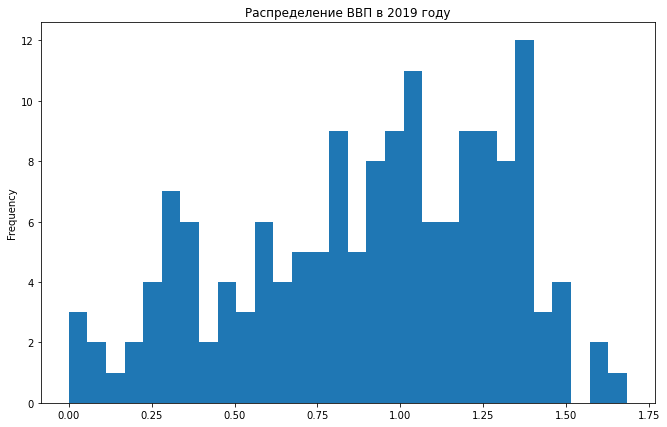

In [117]:
# распределение ВВП в 2019 году
df_2019['GDP per capita'].plot(kind='hist', title='Распределение ВВП в 2019 году', bins=30)

Вывод: есть несоклько групп стран по уровню ВВП
Ярко выражена групп с низким ВВП - в районе 0,25
2 группы стран - в районе 1 и 1,35 можно принять за страны со средним ВВП - мансимальня группа стран
Количество стран с максимальным ВВП - не велико

<AxesSubplot:title={'center':'Изменние общемировой коррупции по годам'}, xlabel='Год', ylabel='Процент коррупции'>

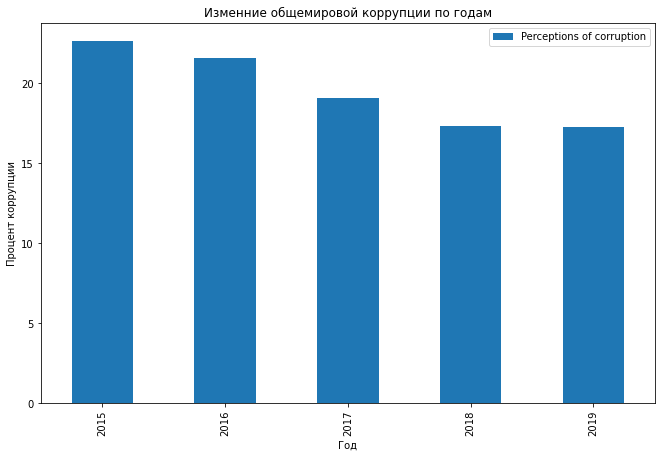

In [130]:
# Изменние общей коррупции по годам
corr_per_years = df[['Perceptions of corruption', 'Year']].groupby('Year').sum()
corr_per_years.plot(kind='bar', title='Изменние общемировой коррупции по годам',
                             xlabel='Год',
                             ylabel='Процент коррупции')

Вывод: по этим данным наблюдаем снижение общей коррупции. При этом разница между 2018 и 2019 годами очень маленькая. Возможе выход на плато.

In [132]:
import seaborn as sns

<AxesSubplot:xlabel='Year', ylabel='Score'>

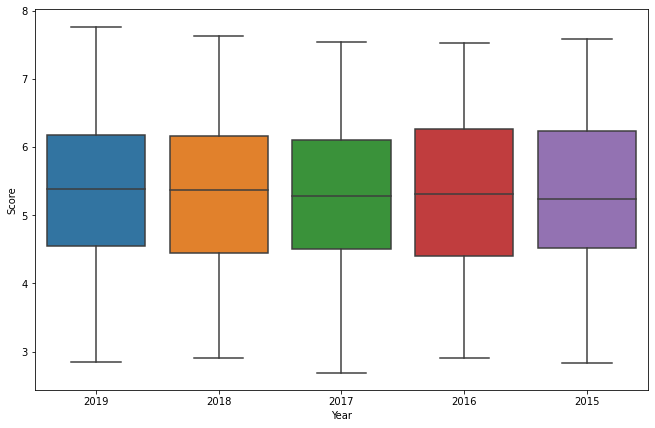

In [135]:
# распределине оценок
sns.boxplot(x="Year", y="Score", data=df[['Score', 'Year']])

Вывод: Медиана - примерно одинакова по годам
в 2018, особенно в 2019 стали с тавить больше высоких оченок
в 2017 году ставили больше низких оценок
в 2017 - наименьший, а в 2016 - наимбольших междквартильный размах
выбросов нет

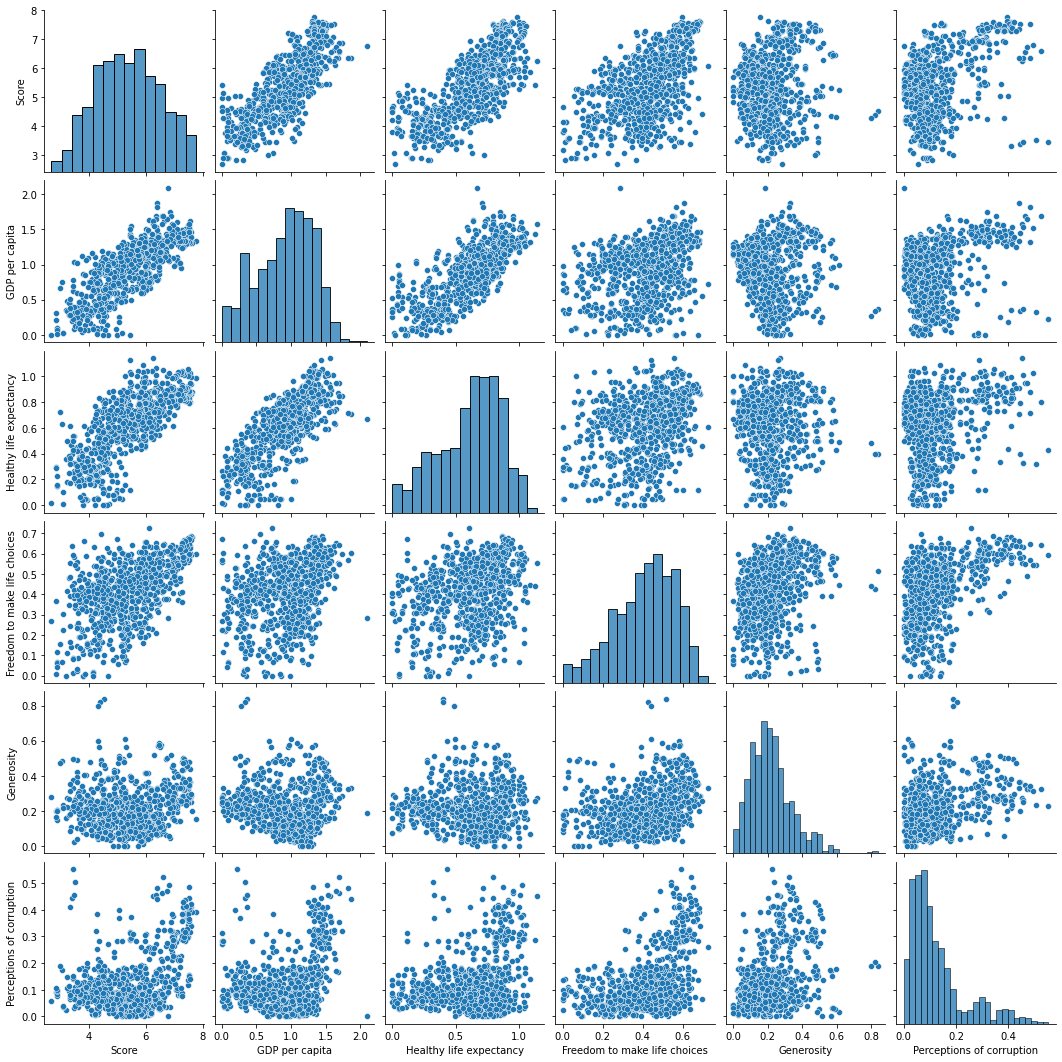

In [139]:
sns.pairplot(df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

Вывод: Процент коррупции - оценка - только небольшая группа стран с низкими оченками и большой коррупцие, в остально оценка не зависит от уровня коррупции

ВВП - коррупция - выделяется небольшая группа странс низким ВВП и высокой коррупцией. также корруция возрастает в ряде стран при ВВП 1,3-1,5

Продожительность жизни - ВВП - практически линейная зависимость

Это данные за все 5 лет.
можно строисть аналогичкие парные графики для каждого года и сравнивать с общим.

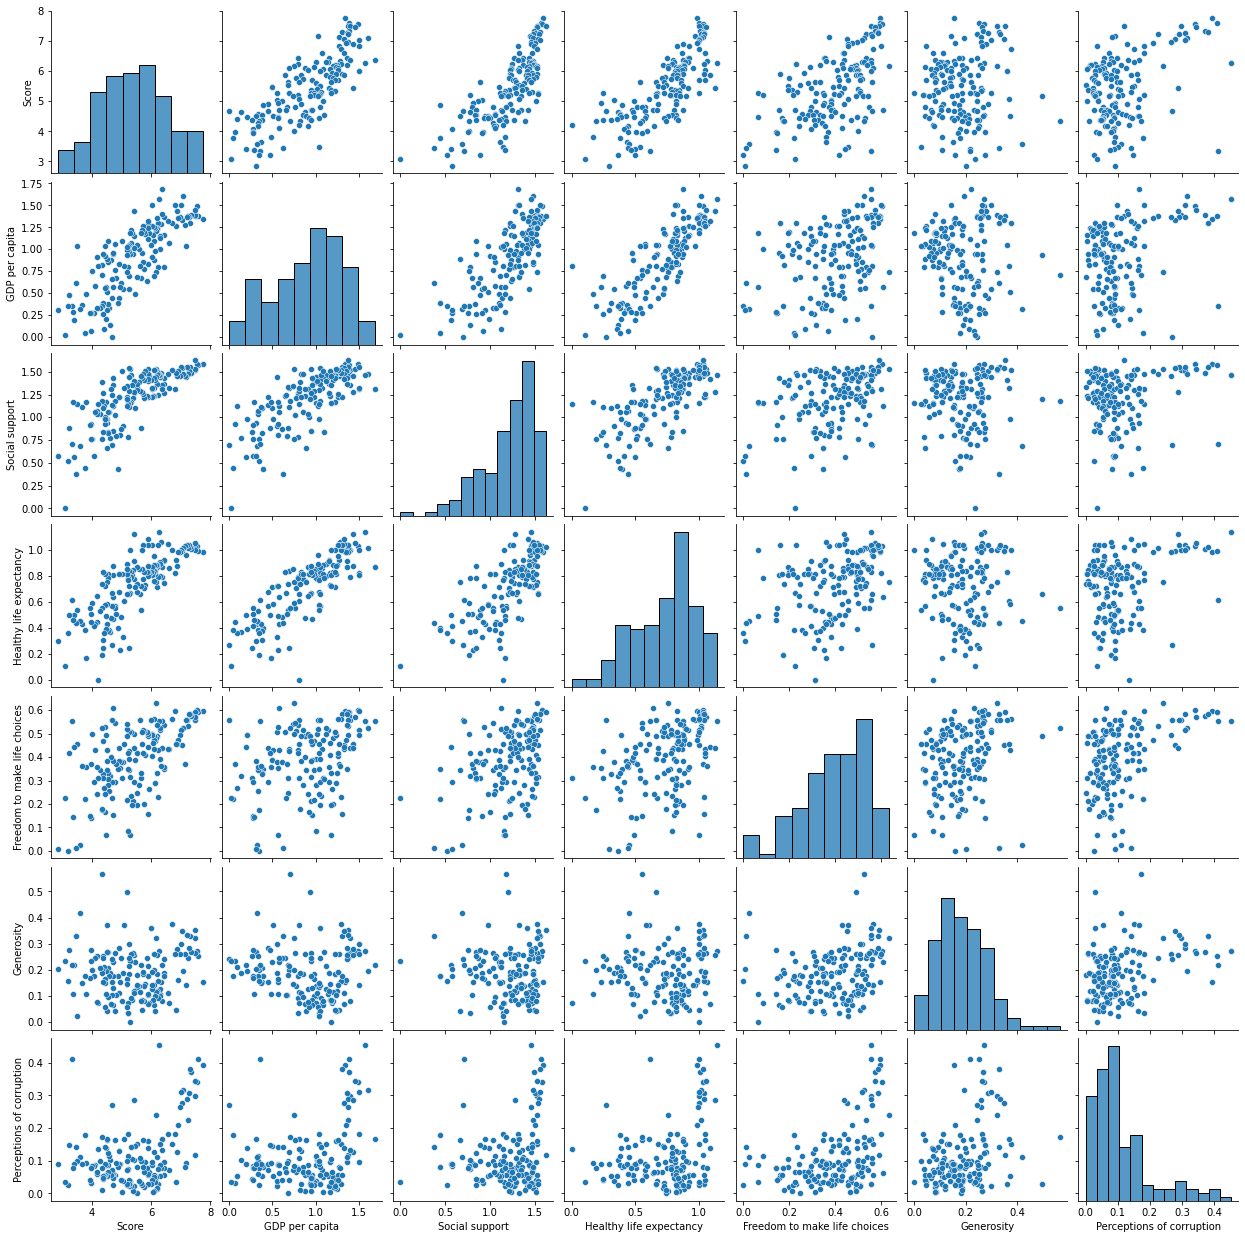

In [144]:
sns.pairplot(df_2019[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

в целом графики имеют такие же тенденции